# QUESTION 5 & 6

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data

In [12]:
df_2020 = pd.read_csv('C:/Users/vadla/Downloads/2020 Cases only.csv', low_memory=False)
df_2021 = pd.read_csv('C:/Users/vadla/Downloads/2021 Cases only.csv', low_memory = False)

### Concatenating the data sets 2020 and 2021

In [13]:
data = pd.concat([df_2020, df_2021])

C:\Users\vadla\AppData\Local\Temp\ipykernel_4572\2274757968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dade_data['ChartDate'] = pd.to_datetime(dade_data['ChartDate'])
C:\Users\vadla\AppData\Local\Temp\ipykernel_4572\2274757968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orange_data['ChartDate'] = pd.to_datetime(orange_data['ChartDate'])


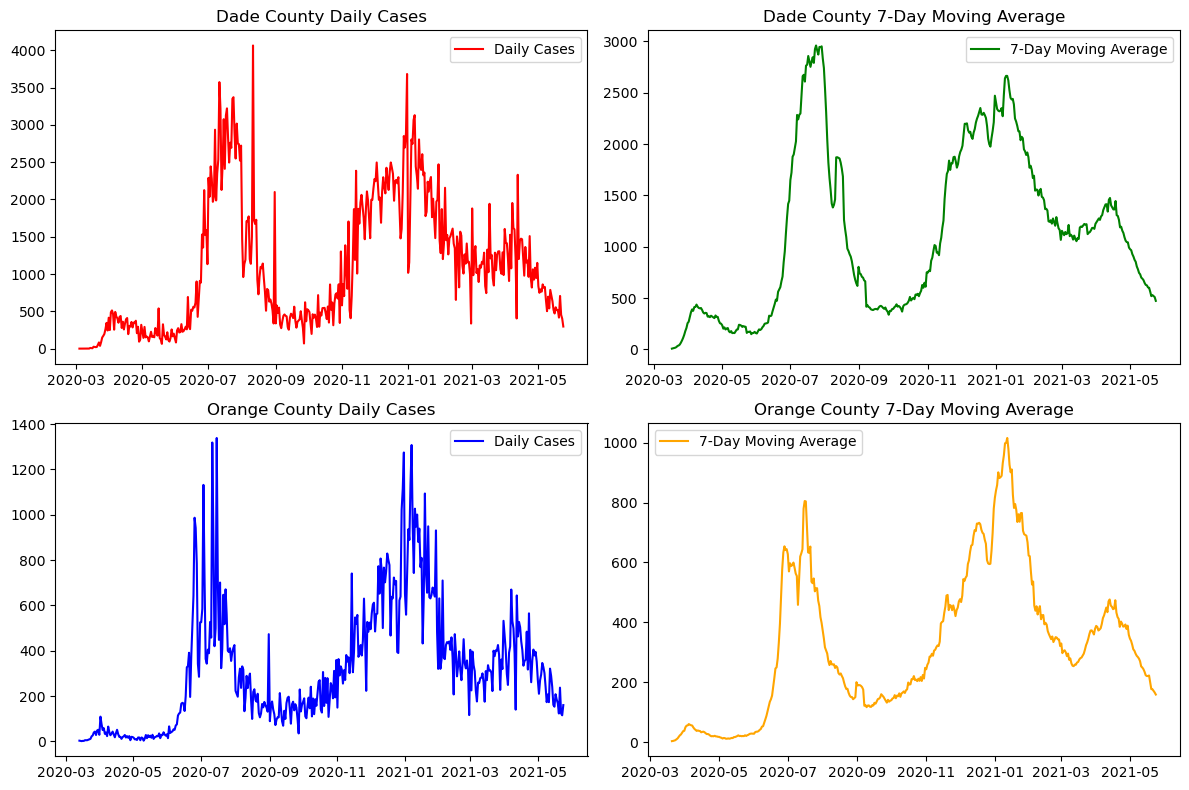

In [14]:
# Extract data for Dade and Orange counties
dade_data = data[data['County'] == 'Dade']
orange_data = data[data['County'] == 'Orange']

# Convert 'ChartDate' to datetime if it's not already
dade_data['ChartDate'] = pd.to_datetime(dade_data['ChartDate'])
orange_data['ChartDate'] = pd.to_datetime(orange_data['ChartDate'])

# Group by 'ChartDate' to get daily cases count
dade_daily_cases = dade_data.groupby('ChartDate').size()
orange_daily_cases = orange_data.groupby('ChartDate').size()

# Compute 7-day moving average
dade_ma = dade_daily_cases.rolling(window=7).mean()
orange_ma = orange_daily_cases.rolling(window=7).mean()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot daily cases for Dade County
axes[0, 0].plot(dade_daily_cases.index, dade_daily_cases, label='Daily Cases', color='red')
axes[0, 0].set_title('Dade County Daily Cases')
axes[0, 0].legend()

# Plot 7-day moving average for Dade County
axes[0, 1].plot(dade_ma.index, dade_ma, label='7-Day Moving Average', color='green')
axes[0, 1].set_title('Dade County 7-Day Moving Average')
axes[0, 1].legend()

# Plot daily cases for Orange County
axes[1, 0].plot(orange_daily_cases.index, orange_daily_cases, label='Daily Cases', color='blue')
axes[1, 0].set_title('Orange County Daily Cases')
axes[1, 0].legend()

# Plot 7-day moving average for Orange County
axes[1, 1].plot(orange_ma.index, orange_ma, label='7-Day Moving Average', color='orange')
axes[1, 1].set_title('Orange County 7-Day Moving Average')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()